In [125]:
#Machine Learning Code

In [130]:
import numpy as np
import pandas as pd
import shutil
import skimage.io
from sklearn.ensemble import BaggingClassifier
import os
import imutils
from sklearn.metrics import confusion_matrix
import skimage.transform
from sklearn.neural_network import MLPClassifier
from os import listdir
from sklearn.ensemble import GradientBoostingClassifier
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py
import matplotlib.pyplot as plt 
from skimage.feature import hog
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

Intialising variables

In [131]:
bins=8
seed=9
scoring="f1_macro"
num_trees=700

Readind dataset

In [132]:
train=pd.read_csv('train.csv')
validation=pd.read_csv('val.csv')
test=pd.read_csv('test_x.csv')

In [133]:
train_x=train.iloc[:,0:46]
train_y=train.iloc[:,46]
validation_x=validation.iloc[:,0:46]
validation_y=validation.iloc[:,46]

Data Balancing

In [119]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
#smt = SMOTE(random_state=777, k_neighbors=1) #SMOTE
smt = ADASYN(random_state=42)                 #ADASYN
train_x_SMOTE, train_y_SMOTE = smt.fit_resample(train_x, train_y)
counts=np.unique(train_y_SMOTE, return_counts=True) 
print(counts)

(array([0, 1, 2]), array([30968, 30306, 30632]))


Feature Selection

In [98]:
#removing 0 variance features
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold()
# train_x=selector.fit_transform(train_x)
# validation_x=selector.transform(validation_x)
# test=selector.transform(test)

In [120]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif,f_classif
from sklearn.decomposition import FactorAnalysis

select=SelectKBest(mutual_info_classif, k=40) #MI
# select=SelectKBest(chi2, k=30)                #CHI2
# select=SelectKBest(f_classif, k=30)           #f_classif
# select=FactorAnalysis(n_components=30, random_state=0)    #Factor Anayisi

train_x_SMOTE = select.fit_transform(train_x_SMOTE,train_y_SMOTE) 
validation_x= select.transform(validation_x) 
test=select.transform(test)

In [121]:
#models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_depth=50,random_state=0,min_samples_split=2)))
models.append(('GB',GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005,random_state=seed)))

results = []
names   = []

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

LR: 0.207652 (0.130341)
LDA: 0.208590 (0.133189)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.471039 (0.129615)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.423266 (0.143493)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.558416 (0.227287)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GB: 0.226650 (0.131482)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.266690 (0.074187)


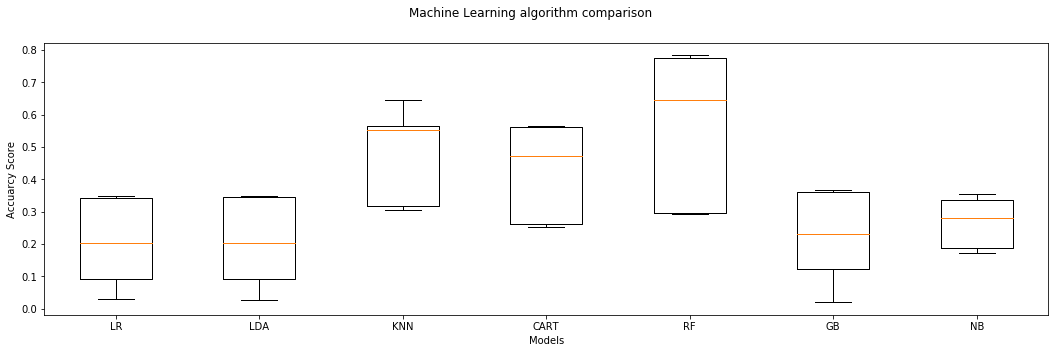

In [124]:
#on training
for name, model in models:  #Corss validation
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train_x_SMOTE, train_y_SMOTE, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = pyplot.figure(figsize=(18,5))
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('Models')
ax.set_ylabel('Accuarcy Score')
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR: 0.372648
LDA: 0.373225
KNN: 0.427060
CART: 0.430230
RF: 0.546990
GB: 0.387280
NB: 0.336491


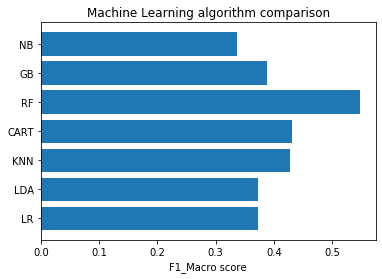

In [129]:
#on validation
results=[]
names=[]
for name, model in models:
    #print(model)
    model.fit(train_x_SMOTE,train_y_SMOTE)
    y_pred=model.predict(validation_x)
    temp=f1_score(validation_y, y_pred, average='macro') #macro f1score
    results.append(temp)
    names.append(name)
    msg = "%s: %f" % (name,temp)
    print(msg)

y_pos = np.arange(len(names))
plt.barh(y_pos, results)
plt.yticks(y_pos, names)
plt.title("Machine Learning algorithm comparison")
plt.xlabel('F1_Macro score')
plt.show()

Code for test data

In [134]:
#combining train and  validation
train_x=train_x.append(validation_x)
train_y=train_y.append(validation_y)
counts=np.unique(train_y, return_counts=True) 
print(counts)

(array([0, 1, 2]), array([41283, 11325,  3089]))


In [135]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
#smt = SMOTE(random_state=777, k_neighbors=1)
smt = ADASYN(random_state=42)
train_x_SMOTE, train_y_SMOTE = smt.fit_sample(train_x, train_y)
counts=np.unique(train_y_SMOTE, return_counts=True) 
print(counts)

(array([0, 1, 2]), array([41283, 39777, 40475]))


In [136]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif
select= SelectKBest(mutual_info_classif, k=40)
#select=FactorAnalysis(n_components=40, random_state=0)
train_x_SMOTE = select.fit_transform(train_x_SMOTE,train_y_SMOTE) 
validation_x= select.transform(validation_x) 
test=select.transform(test)

In [137]:
#on testing
model=RandomForestClassifier(n_estimators=num_trees, max_depth=50,random_state=0,min_samples_split=2) 
model.fit(train_x_SMOTE,train_y_SMOTE)
y_pred=model.predict(test)
print("length of test",len(test))
print("length of reuslt:",len(y_pred))
counts = np.unique(y_pred, return_counts=True) 
print(counts)

length of test 13926
length of reuslt: 13926
(array([0, 1, 2]), array([10154,  3181,   591]))


In [109]:
# saving results
result=pd.DataFrame(columns=['row_id','relevance'])
temp=[i for i in range(len(test))]
result['row_id']=temp
result['relevance']=y_pred
result.to_csv('sample_submission.csv',index=False)